# Different delay widths

In this notebook we want to analyse the effect of different priors for the delay width.

In [1]:
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from tqdm.auto import tqdm
import os

sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19

from header_plotting import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def load_function(country, offset=0, mwd="1.0", interval_cps="10.0", f_fem="0.33", f_robust="1.0", len="normal"):
        folder="covid_uefa_traces14_robustness"
        fstr=lambda tune, draws, max_treedepth, folder: (f"/data.nst/share/soccer_project/{folder}/run"+
            f"-beta=False"+
            f"-country={country}"+
            f"-offset_data={offset}"+
            f"-prior_delay=-1"+
            f"-median_width_delay={mwd}"+
            f"-interval_cps={interval_cps}"+
            f"-f_fem={f_fem}"+
            f"-len=normal"+
            f"-abs_sine=False"+
            f"-t={tune}"+
            f"-d={draws}"+
            f"-max_treedepth={max_treedepth}.pkl")
        if not f_robust == "1.0":
            fstr=lambda tune, draws, max_treedepth, folder: (f"/data.nst/share/soccer_project/covid_uefa_traces14/run"+
                f"-beta=False"+
                f"-country={country}"+
                f"-offset_data={offset}"+
                f"-prior_delay=-1"+
                f"-median_width_delay={mwd}"+
                f"-interval_cps={interval_cps}"+
                f"-f_fem={f_fem}"+
                f"-len=normal"+
                f"-abs_sine=False"+
                f"-t={tune}"+
                f"-d={draws}"+
                f"-max_treedepth={max_treedepth}.pkl")
        model = None
        
        tune, draws, max_treedepth = (2000, 4000, 12)
        folder="covid_uefa_traces14_robustness"
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)):
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
            
        tune, draws, max_treedepth = (1000, 2000, 12)
        folder="covid_uefa_traces15"
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)):
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
        tune, draws, max_treedepth = (500, 1000, 12)
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)):
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
        
        if model is None: 
            print(fstr(tune, draws, max_treedepth, folder), " not found")
            return None, None
        
        # Remove chains with likelihood larger than -200, should only be the case for 2 chains in France
        mask = (np.mean(trace.sample_stats.lp, axis=1)>-200)
        trace.posterior = trace.posterior.sel(chain=~mask)
        return model, trace

In [5]:

# Save figure  keyword args   
save_kwargs = {
    "transparent":True,
    "dpi":300,
    "bbox_inches":"tight"
}
fig_path = "../figures/SI"

def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)


In [7]:
countries = ['England', 'Czechia', 'Scotland', 'Spain', 'Italy', 'Slovakia',
       'Germany', 'Austria', 'Belgium', 'France', 'Portugal',
       'Netherlands']

# Missing:
# Slovakia

tune = 2000
draws = 4000
max_treedepth = 12
traces, models, dls = {}, {}, {}
for country in tqdm(countries):
    models_t, traces_t, dls_t = [],[],[]
    for median_width in [0.5, 1.0, 2.0]:
        #-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl
        model,trace = load_function(country, mwd= median_width)
  
        dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
        models_t.append(model)
        traces_t.append(trace)
        dls_t.append(dl)
    models[country] = models_t
    traces[country] = traces_t
    dls[country] = dls_t

  0%|          | 0/12 [00:00<?, ?it/s]

Use 4000 sample runs for England with 0 offset
Use 4000 sample runs for England with 0 offset
Use 4000 sample runs for England with 0 offset
Use 4000 sample runs for Czechia with 0 offset
Use 4000 sample runs for Czechia with 0 offset
Use 4000 sample runs for Czechia with 0 offset
Use 4000 sample runs for Scotland with 0 offset
Use 4000 sample runs for Scotland with 0 offset
Use 4000 sample runs for Scotland with 0 offset
Use 4000 sample runs for Spain with 0 offset
Use 4000 sample runs for Spain with 0 offset
Use 4000 sample runs for Spain with 0 offset
Use 4000 sample runs for Italy with 0 offset
Use 4000 sample runs for Italy with 0 offset
Use 4000 sample runs for Italy with 0 offset
Use 2000 sample runs for Slovakia with 0 offset
Use 4000 sample runs for Slovakia with 0 offset
Use 2000 sample runs for Slovakia with 0 offset
Use 2000 sample runs for Slovakia with 0 offset
Use 4000 sample runs for Germany with 0 offset
Use 4000 sample runs for Germany with 0 offset
Use 4000 sample ru

[2 1 0]
Country	50.0	2.5	97.5	16	84	>0
England0	9.704596064962274	4.612260193838356	17.029501001438874	5.860540995542723	14.235014648529537	1.0
England1	11.935177588172856	5.267378566966791	22.69459626107414	6.689633736454913	16.120701592170825	1.0
England2	16.222671435595686	6.8845263145623905	26.82618432311524	9.939018754622044	23.11518100312922	1.0
[2 1 0]
Country	50.0	2.5	97.5	16	84	>0
Czechia0	8.679057261180777	2.381568978640467	15.05811053057982	5.453040834414109	11.939808555191252	0.99828125
Czechia1	9.593000276607299	3.181328176697239	16.053185226245763	6.379407492466587	12.905922627279747	0.99859375
Czechia2	10.47499225160378	2.820363643170702	17.420940795210125	6.928016266915128	14.011586234911121	0.996125
[2 1 0]
Country	50.0	2.5	97.5	16	84	>0
Scotland0	3.0784409106805226	1.1520623361634426	7.807793920399214	1.5313406005819272	6.585347370172172	1.0
Scotland1	3.299030800545601	1.226047140552335	7.972233004422457	1.623816121833024	6.7935879624368205	1.0
Scotland2	3.92818073035

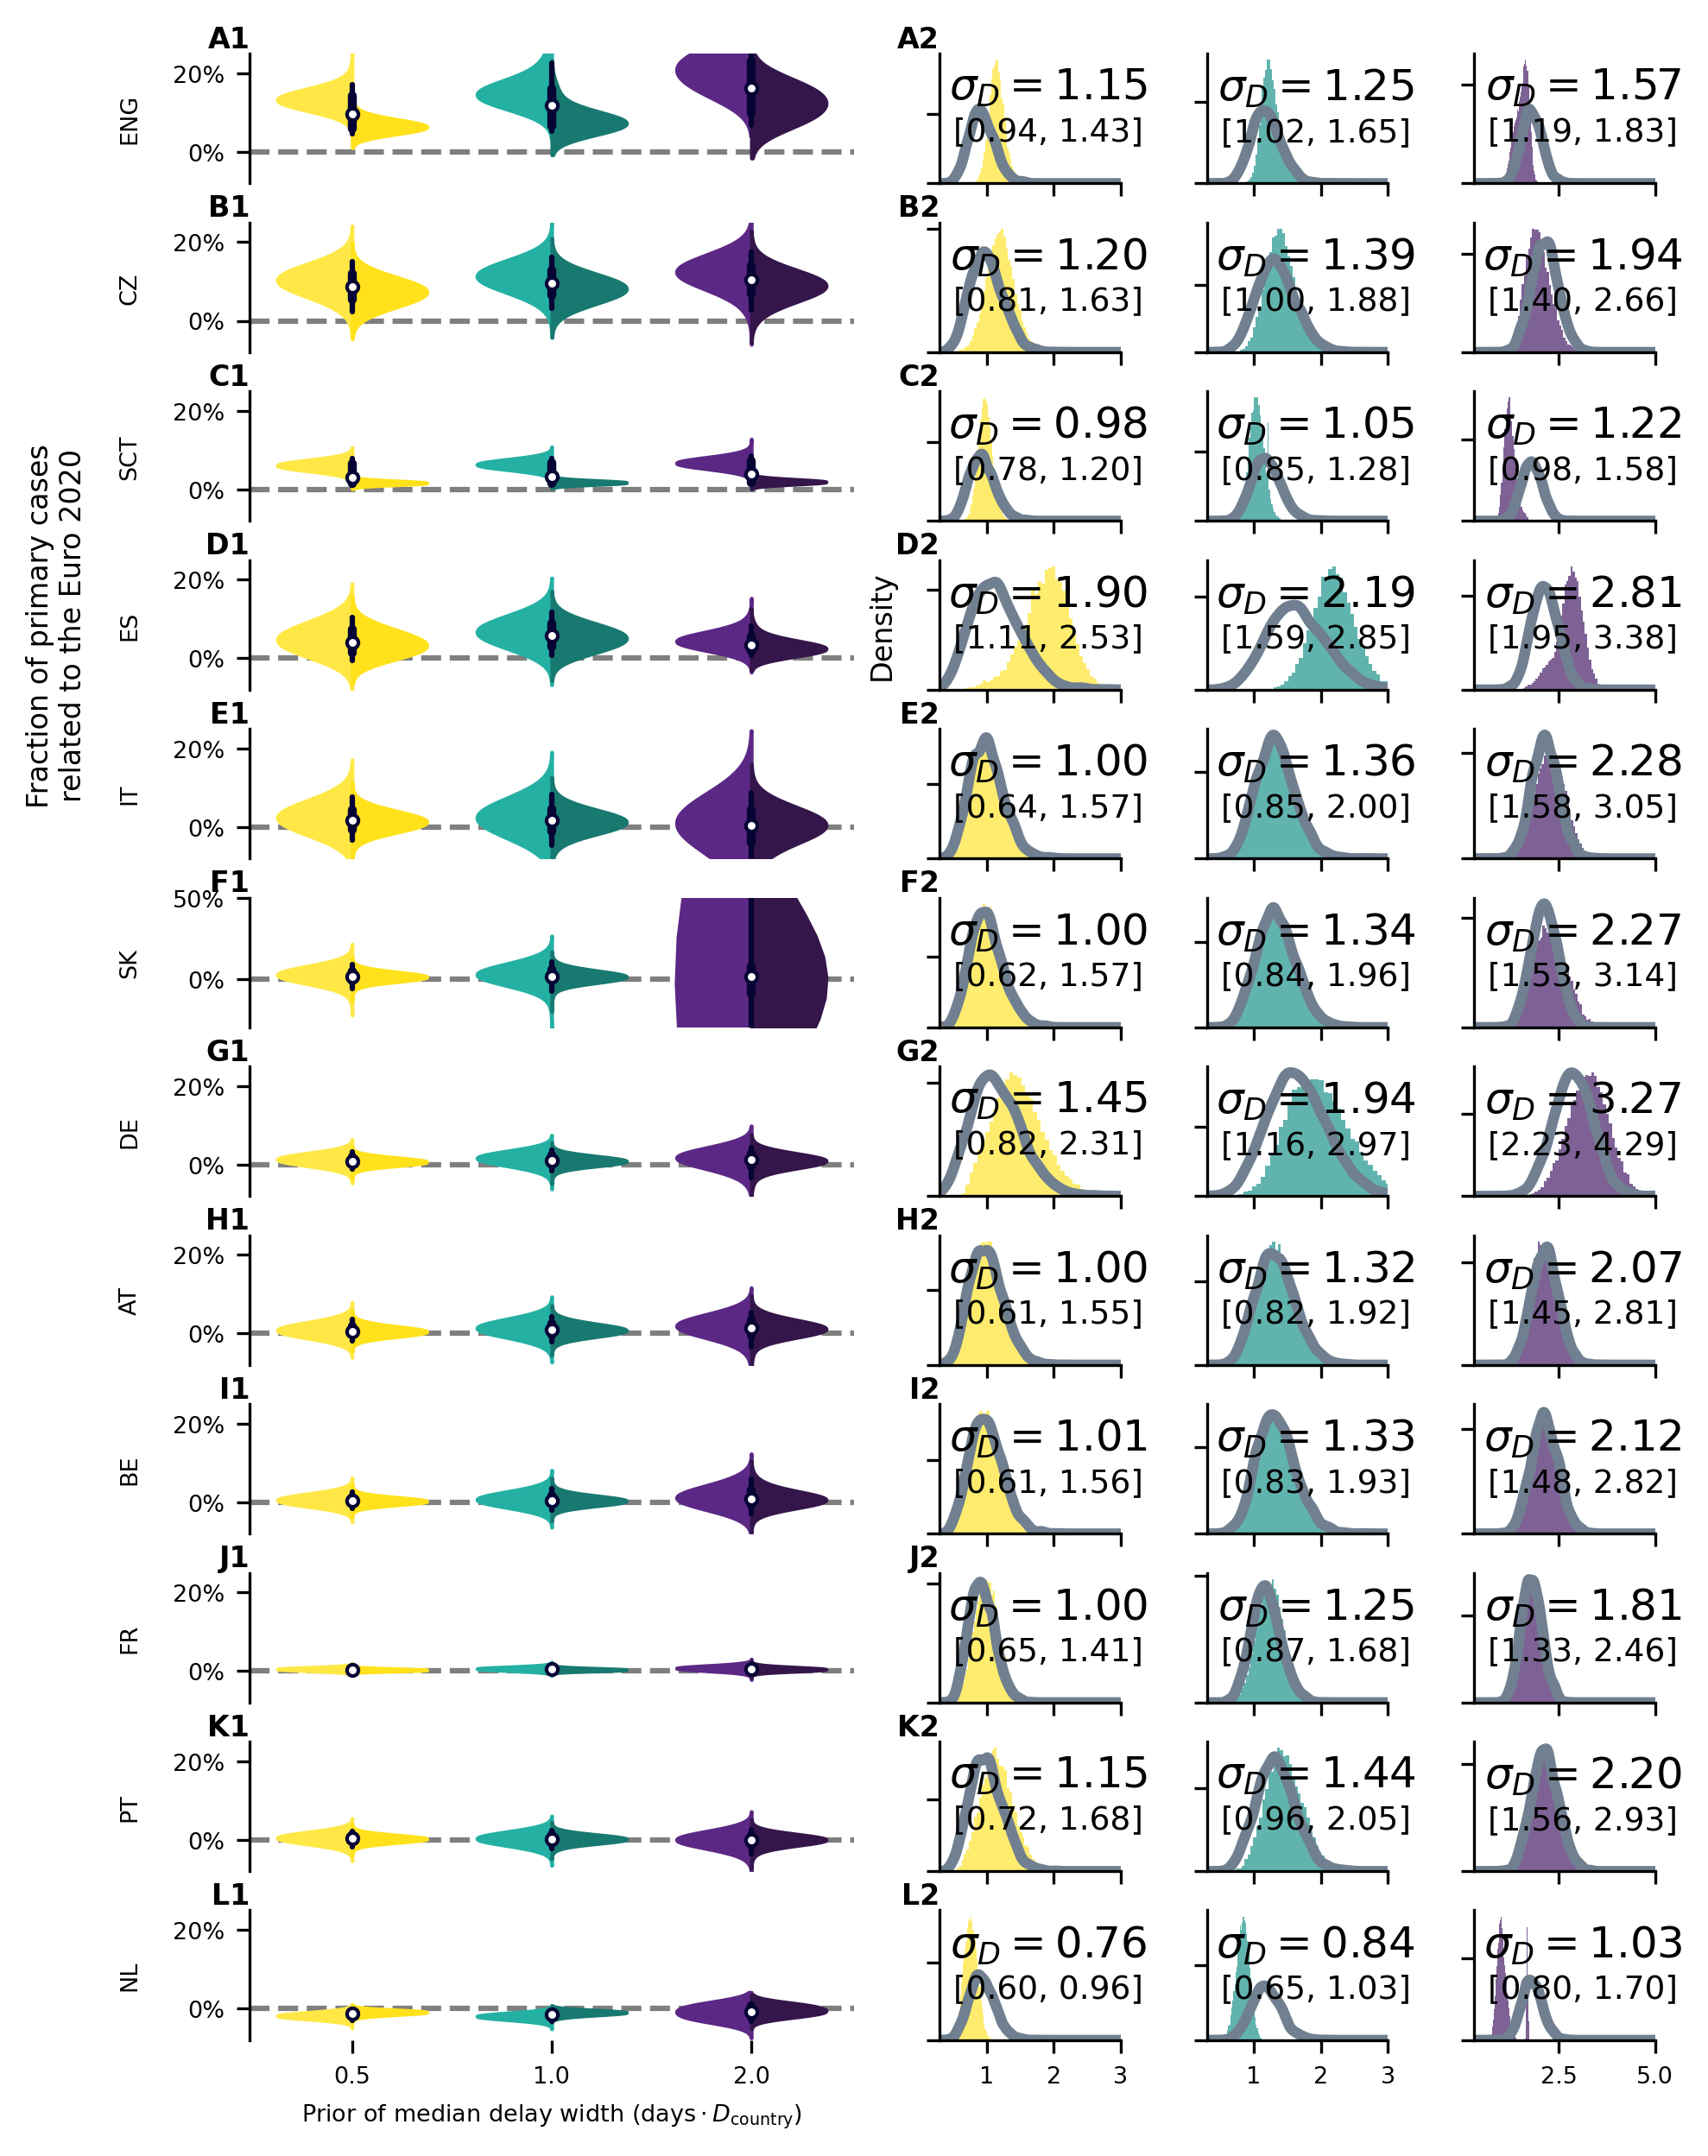

In [30]:
from covid19_soccer.plot.utils import lighten_color
from covid19_soccer.plot.rcParams import *
from matplotlib.colors import to_hex
fig, axes = plt.subplots(len(countries),4,figsize=(7,len(countries)*0.83),gridspec_kw={"width_ratios":[1,0.3,0.3,0.3],"hspace":0.3,"wspace":0.3})

colors_base = ["#ffe530","#1e958a","#481f68"]
l = 0.9
d = 1.1

colors_mf = []
for col in colors_base:
    colors_mf.append(to_hex(lighten_color(col,l)))
    colors_mf.append(to_hex(lighten_color(col,d)))
colors_mf = np.array(colors_mf)

for i, country in enumerate(countries):
    covid19_soccer.plot.other.soccer_related_cases_overview(
        ax=axes[i,0],
        traces=traces[country],
        models=models[country],
        dls=dls[country],
        country_order=[0,1,2],
        colors=colors_mf,
        remove_outliers=True,
        bw=1
        )
    axes[i,0].set_xticklabels(["0.5","1.0","2.0"])
    axes[i,0].set_ylabel(dls[country][0].countries_iso2[0].replace("GB-",""))
    axes[i,0].yaxis.set_label_coords(-0.18, 0.5)

    if i != len(countries)-1:
        axes[i,0].set_xticklabels([])
        axes[i,0].tick_params(bottom=False)

    for j, (trace, model , dl, color,ls) in enumerate(zip(traces[country], models[country], dls[country], colors_base, [(0, (5, 7)),"dashed","-"])):
        
        if j == 2:
            axes[i,j+1].set_xlim(0.3,5)
        else:
            axes[i,j+1].set_xlim(0.3,3)
        rcParams.color_posterior=colors_base[j]
        covid19_soccer.plot.distributions.distribution(
            model,
            trace,
            "delay-width",
            nSamples_prior=5000,
            title="",
            dist_math="\sigma_{D}",
            ax=axes[i,j+1],
        )
        if i != len(countries)-1:
            axes[i,j+1].set_xticklabels([])
    #axes[i,1].set_ylim(0.6,2)
    #axes[i,1].set_yticks([1,1.5])
    #axes[i,1].yaxis.set_label_coords(-0.12, 0.5)
# Array of capital letters
letters = np.array(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

# Add label letters to figure
for i, country in enumerate(countries):
    axes[i,0].text(
        0,
        1.22,
        letters[i]+"1",
        transform=axes[i,0].transAxes,
        fontsize=8,
        fontweight="bold",
        verticalalignment="top",
        ha="right",
    )
    axes[i,1].text(
        0,
        1.22,
        letters[i]+"2",
        transform=axes[i,1].transAxes,
        fontsize=8,
        fontweight="bold",
        verticalalignment="top",
        ha="right",
    )
# set ylims
ylims = {
    "England":[-8,25],
    "Czechia":[-8,25],
    "Italy":[-8,25],
    "Scotland":[-8,25],
    "Spain":[-8,25],
    "Germany":[-8,25],
    "France":[-8,25],
    'Slovakia':[-30,50],
    'Austria':[-8,25],
    'Belgium':[-8,25],
    'Portugal':[-8,25],
    'Netherlands':[-8,25],
}


for i, country in enumerate(countries):
    axes[i,0].set_ylim(ylims[country])

# Set overarching y labels
axes[3,0].text(-0.32,0.5,"Fraction of primary cases\nrelated to the Euro 2020",transform=axes[3,0].transAxes,rotation=90,ha="center",va="center",fontsize=8)
axes[3,1].text(-0.32,0.5,"Density",transform=axes[3,1].transAxes,rotation=90,ha="center",va="center",fontsize=8)



axes[-1,0].set_xlabel("Prior of median delay width ($\mathrm{days}\cdot D_\mathrm{country}}/5$)")

plt.show()
fig.savefig(f"{fig_path}/delay_widths.pdf", **save_kwargs)
fig.savefig(f"{fig_path}/delay_widths.png", **save_kwargs)
plt.close(fig=fig)
